In [1]:
import qml
import numpy as np
from matplotlib import pyplot as plt
from ase import units

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')

### Comparison learning curves atomic and molecular energies

In [2]:
at_ae = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/opt_sigma_all_atomic_atomisation.txt')
at_ae_per_mol = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/opt_sigma_all_atomic_atomisation_per_molecule.txt')

mol_ae_global = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/learning_curve_global_label.txt')


at_ae_per_mol_el = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_per_molecule.txt')
at_ae_H = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_1.0.txt')
at_ae_C = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_6.0.txt')
at_ae_N = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_7.0.txt')
at_ae_O = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/atomic_atomisation_elementwise_Z_8.0.txt')

at_ae_H2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_H_b2.txt')
at_ae_C2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_C_b2.txt')
at_ae_N2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_N_b2.txt')
at_ae_O2 = np.loadtxt('/home/misa/projects/Atomic-Energies/data/lcurves/lcurves_atomisation/best_atomisation_O_b2.txt')

In [3]:
at_ae_O2

array([[1.00000000e+00, 3.43504659e+00, 7.88285886e-01],
       [2.00000000e+00, 2.29286503e+00, 8.70429177e-02],
       [4.00000000e+00, 2.45331697e+00, 2.03772064e-01],
       [8.00000000e+00, 2.19319594e+00, 1.78456183e-01],
       [1.60000000e+01, 1.74816799e+00, 1.52213039e-01],
       [3.20000000e+01, 9.18500046e-01, 1.26230938e-01],
       [6.40000000e+01, 3.55643163e-01, 5.00488124e-02],
       [1.28000000e+02, 1.71415085e-01, 4.29814661e-02],
       [2.56000000e+02, 8.17119928e-02, 9.53145013e-03],
       [5.12000000e+02, 5.25598245e-02, 5.54793683e-03],
       [8.70000000e+02, 3.66325014e-02, 2.17743576e-03]])

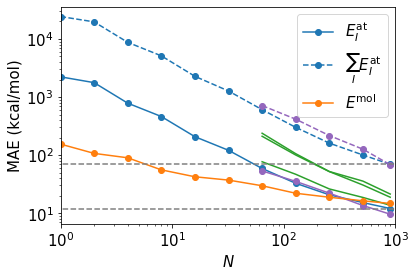

In [11]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1,1)
ax.plot(at_ae[:,0], at_ae[:,1]*627.5, '-o', label = r'$E_I^{\rm at} $', color = 'tab:blue')
ax.plot(at_ae_per_mol[:,0], at_ae_per_mol[:,1]*627.5, '--o', label = r'$\sum_I E_I^{\rm at} $', color = 'tab:blue')


ax.plot(at_ae_H[:,0], at_ae_H[:,1]*627.5, '-o', color='tab:purple')
#ax.plot(at_ae_H2[:,0], at_ae_H2[:,1]*627.5, '-', label = r'$\sum_I E_I^{\rm at} $', color = 'tab:red')
ax.plot(at_ae_C[:,0], at_ae_C[:,1]*627.5, '-', color = 'tab:green')
ax.plot(at_ae_N[:,0], at_ae_N[:,1]*627.5, '-', color = 'tab:green')
ax.plot(at_ae_O[:,0], at_ae_O[:,1]*627.5, '-', color = 'tab:green')
ax.plot(at_ae_per_mol_el[:,0], at_ae_per_mol_el[:,1]*627.5, '--o', color = 'tab:purple')


ax.plot(mol_ae_global[:,0], mol_ae_global[:,1]*627.5, '-o',label = r'$E^{\rm mol} $', color = 'tab:orange')

hor_bar = np.full(2,fill_value=np.amin(at_ae[:,1]*627.5))
hor_bar_tot = np.full(2,fill_value=np.amin(at_ae_per_mol[:,1]*627.5))

hor_bar_x = np.array([ 0, 1200])
ax.plot(hor_bar_x, hor_bar, '--', color='tab:grey')
ax.plot(hor_bar_x, hor_bar_tot, '--', color='tab:grey')

ax.set_xlim(1, 1000)
ax.set_xlabel(r'$N$')
ax.set_ylabel('MAE (kcal/mol)')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([ np.amin(at_ae[:,0]), np.amax(at_ae[:,0])])
#ax.legend(bbox_to_anchor=(1.05,1.0))
ax.legend()
#plt.savefig('/home/misa/projects/phd_symposium_2021/figures/lcurves_atomisation_comparison_elementwise.png', bbox_inches='tight')

In [11]:
hor_bar_x

array([  1., 900.])

In [10]:
hor_bar_tot

array([69.33490537, 69.33490537])

# Numerical Challenges

### Example molecules

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
from explore_qml_data import get_smiles

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

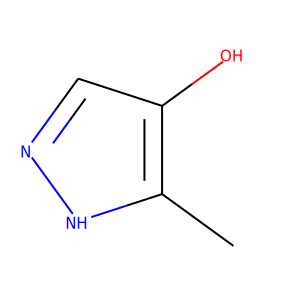

In [2]:
mol_003664 = Chem.MolFromSmiles(get_smiles('/home/misa/datasets/qm9/dsgdb9nsd_003664.xyz'))
SVG(moltosvg(mol_003664))

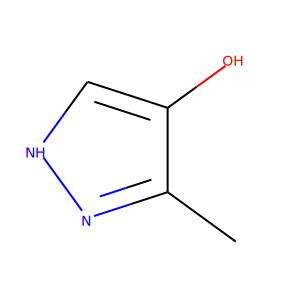

In [42]:
# I have to rewrite the smiles string from the output file so that the two molecules are aligned
mol_003700 = Chem.MolFromSmiles('CC1C(O)=CNN=1')
SVG(moltosvg(mol_003700))

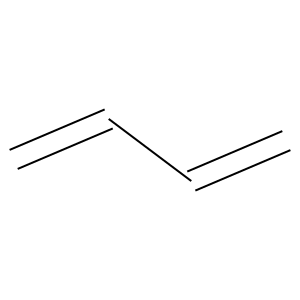

In [2]:
mol = Chem.MolFromSmiles('C=CC=C')
SVG(moltosvg(mol))

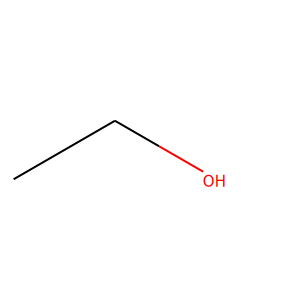

In [3]:
mol = Chem.MolFromSmiles('CCO')
SVG(moltosvg(mol))

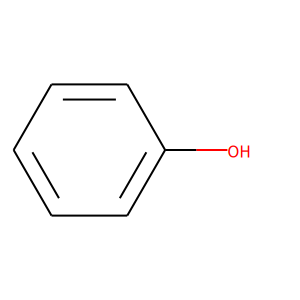

In [4]:
mol = Chem.MolFromSmiles('Oc1ccccc1')
SVG(moltosvg(mol))